<a href="https://colab.research.google.com/github/zubayer87/ML/blob/master/Problem5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
import numpy as np
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_images = np.where(train_images<0.5,0,1)

In [0]:
def dfs(x,y):
  if V[x,y] == 0:
    #print("turning",x,"and",y)
    V[x,y] = 1
    
    if x+1<=27 and x+1>=0 and y>=0 and y<=27:
      dfs(x+1,y)
    if x+1<=27 and x+1>=0 and y-1>=0 and y-1<=27:
      dfs(x+1,y-1)
    if x+1<=27 and x+1>=0 and y+1>=0 and y+1<=27:
      dfs(x+1,y+1)

    if x-1<=27 and x-1>=0 and y>=0 and y<=27:
      dfs(x-1,y)
    if x-1<=27 and x-1>=0 and y+1>=0 and y+1<=27:
      dfs(x-1,y+1)
    if x-1<=27 and x-1>=0 and y-1>=0 and y-1<=27:
      dfs(x-1,y-1)


    if x<=27 and x>=0 and y-1>=0 and y-1<=27:
      dfs(x,y-1)
    if x<=27 and x>=0 and y+1>=0 and y+1<=27:
      dfs(x,y+1)

       

In [85]:

for p in range(60000):
  V = train_images[p]
  white_regions = 0
  for i in range(28):
    for j in range(28):
      #if white DFS start and continue till all are black
      if V[i,j] == 0:
        white_regions +=1
        print(white_regions)
        dfs(i,j)


1
1
2
1
1
1
2
1
2
1
1
1
1
1
1
1
1
2
1
1
1
2
1
2
3
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
2
3
1
1
2
1
2
1
1
2
1
2
1
1
2
1
1
2
3
1
1
2
1
1
2
1
2
3
1
1
2
1
2
1
1
2
1
1
1
1
2
3
1
2
1
2
1
1
1
1
1
2
1
2
1
1
1
2
1
1
2
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
2
1
2
1
1
2
1
1
2
1
2
1
1
2
1
1
1
2
1
2
3
1
2
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
2
1
1
1
1
2
1
1
2
1
1
2
1
2
1
1
1
1
1
1
2
3
1
2
1
1
1
2
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
2
1
2
1
1
2
1
1
2
1
2
1
1
1
2
1
2
1
1
2
1
1
1
2
1
1
2
1
1
2
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
2
1
1
2
3
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
2
3
1
1
2
3
1
1
2
1
1
1
2
1
1
1
1
2
1
1
1
2
1
1
2
1
1
1
2
1
1
1
1
2
3
1
2
1
2
1
1
2
1
1
1
1
2
1
1
1
1
1
2
1
1
1
2
1
1
1
1
2
3
1
2
1
1
1
2
1
1
1
1
2
1
1
1
2
1
1
1
1
1
2
1
1
1
2
1
2
3
1
1
2
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
2
1
2
3
1
1
2
1
2
1
2
1
1
1
1
1
1
1
2
1
2
1
2
1
1
1
1
2
1
1
2
1
2
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
2
3
1
2
1
1
1
1
1
2
1
1
1
1
2
3
1
1
1
2
1
2
1
2
3
1
1
2
1
1
2
3
1
1
1


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-85-c1a28bb8ec61>", line 11, in <module>
    dfs(i,j)
  File "<ipython-input-84-cd40467c215c>", line 7, in dfs
    dfs(x+1,y)
  File "<ipython-input-84-cd40467c215c>", line 7, in dfs
    dfs(x+1,y)
  File "<ipython-input-84-cd40467c215c>", line 7, in dfs
    dfs(x+1,y)
  [Previous line repeated 24 more times]
  File "<ipython-input-84-cd40467c215c>", line 16, in dfs
    dfs(x-1,y+1)
  File "<ipython-input-84-cd40467c215c>", line 7, in dfs
    dfs(x+1,y)
  File "<ipython-input-84-cd40467c215c>", line 16, in dfs
    dfs(x-1,y+1)
  File "<ipython-input-84-cd40467c215c>", line 7, in dfs
    dfs(x+1,y)
  File "<ipython-input-84-cd40467c215c>", line 16, in dfs
    dfs(x-1,y+1)
  File "<ipython-input-84-cd40467c215c>", line 7, in dfs
    dfs(x+1,y)
  File "<ipython-input-84-cd4046

KeyboardInterrupt: ignored

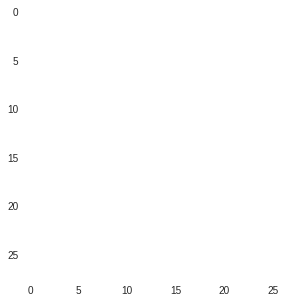

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.imshow(train_images[6])
plt.grid(None)
plt.show()

In [32]:
V[1,1]

1